In [1]:
!pip install khayyam
!pip install unidecode

     |████████████████████████████████| 46 kB 1.8 MB/s 
  Created wheel for khayyam: filename=Khayyam-3.0.17-cp37-cp37m-linux_x86_64.whl size=74606 sha256=dc40c7f44626b7b70ac94a51a113c23f5695d35b198562104f753d2f2bbfb2e1
  Stored in directory: /root/.cache/pip/wheels/5c/27/04/a40f5c44518210fbd57f8a2045ee50f835bcb75fe884daca06
Successfully built khayyam
     |████████████████████████████████| 235 kB 4.3 MB/s 


In [2]:
pip install 'openpyxl==3.0.0'

     |████████████████████████████████| 172 kB 3.8 MB/s 
  Created wheel for openpyxl: filename=openpyxl-3.0.0-py2.py3-none-any.whl size=241207 sha256=b6e01bffcf133169e36088db8ea311ccded2b2ba3e55c5d98f3cd113b5e92380
  Stored in directory: /root/.cache/pip/wheels/c7/64/ff/ce98f6e1d2701ae8e216c875da62feed2839ac8a3cae0ab8af
Successfully built openpyxl
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 2.5.9
    Uninstalling openpyxl-2.5.9:
      Successfully uninstalled openpyxl-2.5.9


In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random
from numpy import array

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU
import tensorflow as tf

from itertools import cycle
from khayyam import *
from datetime import date, datetime
import datetime as dt
from unidecode import unidecode
# ! pip install plotly

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
khapares = pd.read_csv('/content/drive/MyDrive/SN/Final/final__/khapares.csv')
khapares

,Open,Low,High,Close,Date,symbol,volume,gregorian_date,SMA5,EWMA5,RSI
0,5900.0,5710.0,5930.0,5910.0,1400-1-7,خپارس,34794750,2021-03-27,NaN,5910.000000,NaN
1,6260.0,6110.0,6260.0,6250.0,1400-1-8,خپارس,161273112,2021-03-28,NaN,6114.000000,NaN
2,6210.0,6130.0,6350.0,6190.0,1400-1-10,خپارس,61489110,2021-03-30,NaN,6150.000000,NaN
3,6170.0,6070.0,6310.0,6160.0,1400-1-11,خپارس,44631861,2021-03-31,NaN,6154.153846,NaN
4,6150.0,6040.0,6150.0,6060.0,1400-1-14,خپارس,9232003,2021-04-03,6114.0,6118.009479,NaN
...,...,...,...,...,...,...,...,...,...,...,...
133,1050.0,1019.0,1070.0,1042.0,1400-10-27,خپارس,115233192,2022-01-17,1051.4,1046.506828,47.159977
134,1019.0,990.0,1024.0,995.0,1400-10-28,خپارس,174902687,2022-01-18,1032.8,1029.337885,40.503644
135,990.0,988.0,1028.0,1002.0,1400-10-29,خپارس,79892454,2022-01-19,1019.8,1020.225257,41.820731
136,1010.0,973.0,1035.0,994.0,1400-11-2,خپارس,95415649,2022-01-22,1012.8,1011.483505,40.711511


In [6]:
khapares_social = pd.read_excel('/content/drive/MyDrive/SN/Final/social_data/خپارس.xlsx')
khapares_social

,date and time,view
0,۰۹:۲۵:۴۹ ۱۴۰۰/۰۱/۰۲,32
1,۰۰:۳۳:۰۸ ۱۴۰۰/۰۱/۰۴,301
2,۰۸:۲۳:۱۳ ۱۴۰۰/۰۱/۰۴,310
3,۱۳:۰۶:۲۳ ۱۴۰۰/۰۱/۰۴,918
4,۱۸:۳۸:۲۷ ۱۴۰۰/۰۱/۰۴,132
...,...,...
7212,۱۶:۴۱:۴۱ ۱۴۰۰/۱۱/۰۳,13
7213,۱۷:۰۹:۵۲ ۱۴۰۰/۱۱/۰۳,1846
7214,۱۷:۵۰:۲۶ ۱۴۰۰/۱۱/۰۳,1649
7215,۱۷:۵۷:۰۴ ۱۴۰۰/۱۱/۰۳,897


In [7]:
khapares_social.columns = ['date and time', 'view']
khapares_social['presian_date'] = khapares_social['date and time'].apply(lambda x: x.split(" ")[1])
khapares_social['gregorian_date'] = khapares_social['presian_date'].apply(lambda x: JalaliDate(int(unidecode(x.split("/")[0])), int(unidecode(x.split("/")[1])), int(unidecode(x.split("/")[2]))).todate())
khapares_social = khapares_social[['gregorian_date', 'view']]
khapares_social = khapares_social.groupby(by='gregorian_date').mean()
khapares_social['gregorian_date'] = khapares_social.index
khapares_social['gregorian_date'] = khapares_social['gregorian_date'].astype(str)
khapares_social['index'] = [i for i in range(len(khapares_social))]
khapares_social.set_index('index', inplace=True)
khapares_social

,view,gregorian_date
index,,
0,32.000000,2021-03-22
1,515.800000,2021-03-24
2,2835.250000,2021-03-26
3,3107.348485,2021-03-27
4,2093.831858,2021-03-28
...,...,...
283,1179.583333,2022-01-19
284,2680.473684,2022-01-20
285,1152.047619,2022-01-21


# Merging

In [8]:
khaperes_df=pd.merge(khapares,khapares_social, on='gregorian_date', how='inner')
khaperes_df

,Open,Low,High,Close,Date,symbol,volume,gregorian_date,SMA5,EWMA5,RSI,view
0,5900.0,5710.0,5930.0,5910.0,1400-1-7,خپارس,34794750,2021-03-27,NaN,5910.000000,NaN,3107.348485
1,6260.0,6110.0,6260.0,6250.0,1400-1-8,خپارس,161273112,2021-03-28,NaN,6114.000000,NaN,2093.831858
2,6210.0,6130.0,6350.0,6190.0,1400-1-10,خپارس,61489110,2021-03-30,NaN,6150.000000,NaN,2340.500000
3,6170.0,6070.0,6310.0,6160.0,1400-1-11,خپارس,44631861,2021-03-31,NaN,6154.153846,NaN,3767.730769
4,6150.0,6040.0,6150.0,6060.0,1400-1-14,خپارس,9232003,2021-04-03,6114.0,6118.009479,NaN,2681.150000
...,...,...,...,...,...,...,...,...,...,...,...,...
133,1050.0,1019.0,1070.0,1042.0,1400-10-27,خپارس,115233192,2022-01-17,1051.4,1046.506828,47.159977,321.210526
134,1019.0,990.0,1024.0,995.0,1400-10-28,خپارس,174902687,2022-01-18,1032.8,1029.337885,40.503644,357.000000
135,990.0,988.0,1028.0,1002.0,1400-10-29,خپارس,79892454,2022-01-19,1019.8,1020.225257,41.820731,1179.583333
136,1010.0,973.0,1035.0,994.0,1400-11-2,خپارس,95415649,2022-01-22,1012.8,1011.483505,40.711511,624.976744


In [ ]:
# k = khaperes_df['view'].ewm(span=10, adjust=False, min_periods=12).mean()
# # Get the 12-day EMA of the closing price
# d = khaperes_df['view'].ewm(span=22, adjust=False, min_periods=26).mean()
# # Subtract the 26-day EMA from the 12-Day EMA to get the MACD
# macd = k - d
# # Get the 9-Day EMA of the MACD for the Trigger line
# macd_s = macd.ewm(span=9, adjust=False, min_periods=9).mean()
# # Calculate the difference between the MACD - Trigger for the Convergence/Divergence value
# macd_h = macd - macd_s
# # Add all of our new values for the MACD to the dataframe
# khaperes_df['macd'] = khaperes_df.index.map(macd)
# khaperes_df['macd_h'] = khaperes_df.index.map(macd_h)
# khaperes_df['macd_s'] = khaperes_df.index.map(macd_s)
# # View our data
# pd.set_option("display.max_columns", None)
# khaperes_df

In [9]:
def computeRSI (data, time_window):
    oneday = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    gain = 0 * oneday
    loss = 0 * oneday
    
    gain[oneday > 0] = oneday[ oneday>0 ]
    
    loss[oneday < 0] = oneday[ oneday < 0 ]
    

    gain_avg   = gain.ewm(com=time_window-1 , min_periods=time_window).mean() #gainavg  is average gain over time window (period)
    loss_avg = loss.ewm(com=time_window-1 , min_periods=time_window).mean() #lossavg  is average loss over time window (period)
    
    rs = abs(gain_avg/loss_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [10]:
khaperes_df['view'] = khaperes_df['view'].to_frame()
khaperes_df['SMA5_view'] = khaperes_df['view'].rolling(5).mean()
khaperes_df['EWMA5_view'] = khaperes_df['view'].ewm(span=5).mean()
khaperes_df['RSI_view'] = computeRSI(khaperes_df['view'], 14)

# RSI

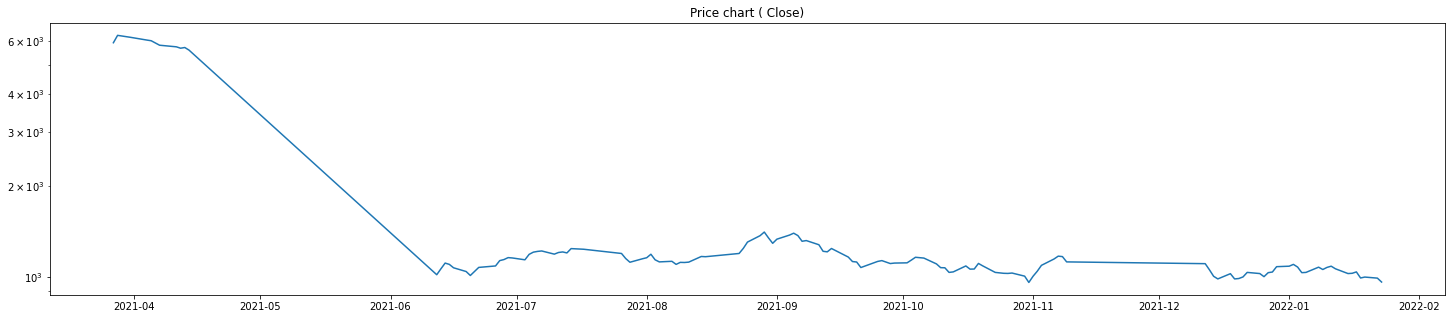

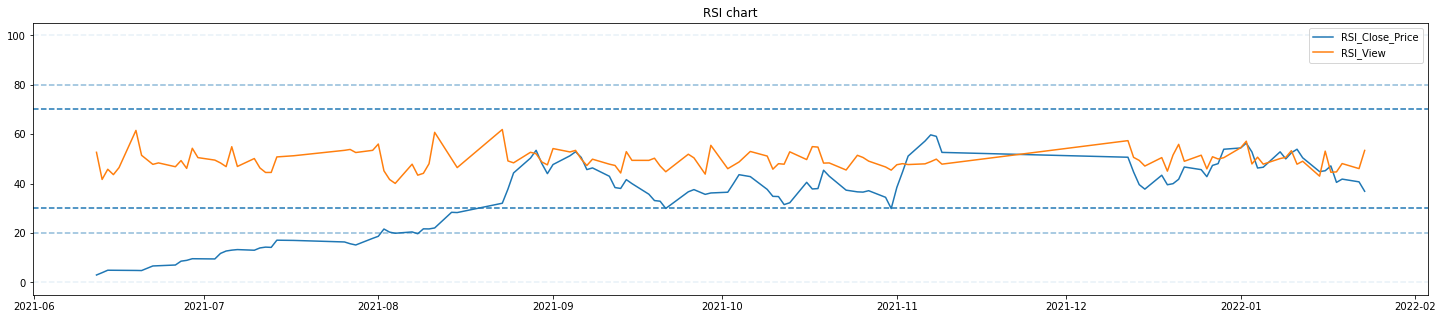

In [11]:
plt.figure(figsize=(25,5))
khaperes_df['date'] = pd.to_datetime(khaperes_df['gregorian_date'], format = '%Y-%m-%d')
plt.plot(khaperes_df['date'], khaperes_df['Close'],label='Close_Price')
plt.title('Price chart ( Close)')
plt.yscale("log")
plt.show()
plt.figure(figsize=(25,5))
plt.title('RSI chart')
plt.plot(khaperes_df['date'], khaperes_df['RSI'],label='RSI_Close_Price')
plt.plot(khaperes_df['date'], khaperes_df['RSI_view'],label='RSI_View')
plt.axhline(0, linestyle='--', alpha=0.1)
plt.axhline(20, linestyle='--', alpha=0.5)
plt.axhline(30, linestyle='--')
plt.axhline(70, linestyle='--')
plt.axhline(80, linestyle='--', alpha=0.5)
plt.axhline(100, linestyle='--', alpha=0.1)
plt.legend()
plt.show()

In [12]:
# Force lowercase (optional)
khaperes_df.columns = [x.lower() for x in khaperes_df.columns]
fig = make_subplots(rows=2, cols=1,subplot_titles=("Logarithmic Scale","Default Scale"))
# close price
fig.append_trace(
    go.Scatter(
        x=khaperes_df['gregorian_date'],
        y=(khaperes_df['close']),
        line=dict(color='#ff9900', width=1),
        name='Close',
        legendgroup='1',
    ), row=1, col=1
)

fig.append_trace(
    go.Scatter(
        x=khaperes_df['gregorian_date'],
        y=khaperes_df['rsi'],
        line=dict(color='#ff9900', width=2),
        name='RSI_Close',
        
        legendgroup='2',

    ), row=2, col=1
)

fig.append_trace(
    go.Scatter(
        x=khaperes_df['gregorian_date'],
        y=khaperes_df['rsi_view'],
        line=dict(color='black', width=2),
        name='RSI_View',

        legendgroup='2',
        
    ), row=2, col=1
)

layout = go.Layout(
    plot_bgcolor='#efefef',
    
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=18,
     width=1500,
     height=900
    # xaxis=dict(
    #     rangeslider=dict(
    #         visible=False
        )
    

# Update options and show plot
fig.update_yaxes( type="log", row=1, col=1)

fig.update_layout(layout)

fig.show()

# SMA

In [13]:
khaperes_df.columns = [x.lower() for x in khaperes_df.columns]
fig = make_subplots(rows=2, cols=1,subplot_titles=("Logarithmic Scale","Default Scale"))
# close price
fig.append_trace(
    go.Scatter(
        x=khaperes_df['gregorian_date'],
        y=(khaperes_df['close']),
        line=dict(color='#ff9900', width=1),
        name='Close',
        legendgroup='1',
    ), row=1, col=1
)

fig.append_trace(
    go.Scatter(
        x=khaperes_df['gregorian_date'],
        y=khaperes_df['sma5'],
        line=dict(color='#ff9900', width=2),
        name='SMA5_Close',
        legendgroup='2',

    ), row=2, col=1
)

fig.append_trace(
    go.Scatter(
        x=khaperes_df['gregorian_date'],
        y=khaperes_df['sma5_view'],
        line=dict(color='black', width=2),
        name='SMA5_view',

        legendgroup='2',
        
    ), row=2, col=1
)

layout = go.Layout(
    plot_bgcolor='#efefef',
    
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=18,
     width=1500,
     height=900
        )
    

# Update options and show plot
fig.update_yaxes( type="log", row=1, col=1)

fig.update_layout(layout)

fig.show()

In [ ]:
khaperes_df

,open,low,high,close,date,symbol,volume,gregorian_date,sma5,ewma5,rsi,view,sma5_view,ewma5_view,rsi_view,date
0,5900.0,5710.0,5930.0,5910.0,1400-1-7,خپارس,34794750,2021-03-27,NaN,5910.000000,NaN,3107.348485,NaN,3107.348485,NaN,2021-03-27
1,6260.0,6110.0,6260.0,6250.0,1400-1-8,خپارس,161273112,2021-03-28,NaN,6114.000000,NaN,2093.831858,NaN,2499.238509,NaN,2021-03-28
2,6210.0,6130.0,6350.0,6190.0,1400-1-10,خپارس,61489110,2021-03-30,NaN,6150.000000,NaN,2340.500000,NaN,2424.046584,NaN,2021-03-30
3,6170.0,6070.0,6310.0,6160.0,1400-1-11,خپارس,44631861,2021-03-31,NaN,6154.153846,NaN,3767.730769,NaN,2982.192322,NaN,2021-03-31
4,6150.0,6040.0,6150.0,6060.0,1400-1-14,خپارس,9232003,2021-04-03,6114.0,6118.009479,NaN,2681.150000,2798.112222,2866.626312,NaN,2021-04-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,1050.0,1019.0,1070.0,1042.0,1400-10-27,خپارس,115233192,2022-01-17,1051.4,1046.506828,47.159977,321.210526,1320.971824,1319.687601,44.594112,2022-01-17
134,1019.0,990.0,1024.0,995.0,1400-10-28,خپارس,174902687,2022-01-18,1032.8,1029.337885,40.503644,357.000000,1089.947434,998.791734,44.739582,2022-01-18
135,990.0,988.0,1028.0,1002.0,1400-10-29,خپارس,79892454,2022-01-19,1019.8,1020.225257,41.820731,1179.583333,972.203494,1059.055600,48.111647,2022-01-19
136,1010.0,973.0,1035.0,994.0,1400-11-2,خپارس,95415649,2022-01-22,1012.8,1011.483505,40.711511,624.976744,1031.936343,914.362648,46.070409,2022-01-22


In [ ]:
khaperes_df['sma5']=khaperes_df['sma5'].fillna(value=khaperes_df['sma5'].mean())
khaperes_df['rsi']=khaperes_df['rsi'].fillna(value=khaperes_df['rsi'].mean())
khaperes_df['sma5_view'].fillna(value=khaperes_df['sma5_view'].mean())
khaperes_df['rsi_view']=khaperes_df['rsi_view'].fillna(value=khaperes_df['rsi_view'].mean())

In [ ]:
khaperes_df.isna().sum()

open              0
low               0
high              0
close             0
date              0
symbol            0
volume            0
gregorian_date    0
sma5              0
ewma5             0
rsi               0
view              0
sma5_view         4
ewma5_view        0
rsi_view          0
date              0
dtype: int64

## Part 1 : predicting stock close price with close indicator(RSI)

In [ ]:
#khaperes_new = khaperes_df[['gregorian_date','rsi','rsi_view','sma5','sma5_view']]
#khaperes_new = khaperes_df[['gregorian_date','close','view']]
khaperes_new = khaperes_df[['gregorian_date','rsi']]

print("Shape of close dataframe:", khaperes_new.shape)

Shape of close dataframe: (138, 2)


In [ ]:
del khaperes_new['gregorian_date']
scaler=MinMaxScaler(feature_range=(0,1))
khaperes_new=scaler.fit_transform(np.array(khaperes_new).reshape(-1,1))

In [ ]:
def split(y, train_size=0.72):
    time_step = 15
    mid_train = int(len(y)*train_size)
    mid_test=len(y)-mid_train
    train_data=y[0:mid_train,:]
    test_data =y[mid_train:len(y),:1]
    X_train, y_train = create_dataset(train_data, time_step)
    X_test, y_test = create_dataset(test_data, time_step)
    return train_data,test_data,X_train, y_train,X_test,y_test

def create_dataset(data, time_step=1):
    X = []
    Y=[]
    for i in range(len(data)-time_step-1):
        z = data[i:(i+time_step), 0]  
        X.append(z)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

In [ ]:
train_data,test_data,X_train, y_train,X_test,y_test=split(khaperes_new, train_size=0.79)
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

train_data:  (109, 1)
test_data:  (29, 1)
X_train:  (93, 15)
y_train:  (93,)
X_test:  (13, 15)
y_test (13,)


In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
tf.keras.backend.clear_session()
time_step = 15
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 15, 32)            8320      
                                                                 
 gru (GRU)                   (None, 15, 32)            6336      
                                                                 
 gru_1 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 25,377
Trainable params: 25,377
Non-trainable params: 0
_________________________________________________________________


# Fitting the model on our train data

In [ ]:
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
history_close_price=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=5,verbose=1)


Epoch 1/50
19/19 [==============================] - 12s 156ms/step - loss: 0.0858 - val_loss: 0.0236
Epoch 2/50
19/19 [==============================] - 1s 30ms/step - loss: 0.0437 - val_loss: 0.0154
Epoch 3/50
19/19 [==============================] - 1s 31ms/step - loss: 0.0405 - val_loss: 0.0073
Epoch 4/50
19/19 [==============================] - 1s 30ms/step - loss: 0.0374 - val_loss: 0.0064
Epoch 5/50
19/19 [==============================] - 1s 31ms/step - loss: 0.0339 - val_loss: 0.0057
Epoch 6/50
19/19 [==============================] - 1s 30ms/step - loss: 0.0320 - val_loss: 0.0054
Epoch 7/50
19/19 [==============================] - 1s 30ms/step - loss: 0.0330 - val_loss: 0.0133
Epoch 8/50
19/19 [==============================] - 1s 30ms/step - loss: 0.0251 - val_loss: 0.0075
Epoch 9/50
19/19 [==============================] - 1s 30ms/step - loss: 0.0227 - val_loss: 0.0259
Epoch 10/50
19/19 [==============================] - 1s 30ms/step - loss: 0.0218 - val_loss: 0.0065
Epoch 1

# Loss

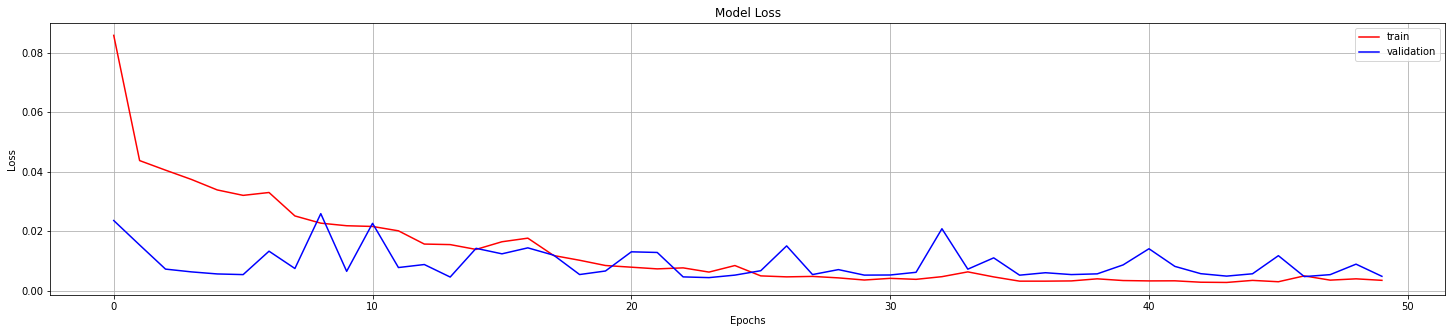

In [ ]:
# Plot the Loss Curves

plt.figure(figsize=(25,5))
plt.plot(history_close_price.history['loss'],'r')
plt.plot(history_close_price.history['val_loss'],'b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()

In [ ]:
predict=model.predict(X_test)
predictt = scaler.inverse_transform(predict)
ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [ ]:
print("Test data R2 score:", r2_score(ytest, predictt))

Test data R2 score: 0.1859925691567117


In [ ]:
k=test_data[len(test_data)-time_step:].reshape(1,-1)
temp=list(k)
temp=temp[0].tolist()
next_day_predict=[]
steps=time_step
for i in range(5):
    if(len(temp)>time_step):
        k=np.array(temp[1:])
        k = k.reshape(1,-1)
        k = k.reshape((1, steps, 1))
        predict_next_days = model.predict(k, verbose=0)
        temp.extend(predict_next_days[0].tolist())
        temp=temp[1:]
        next_day_predict.extend(predict_next_days.tolist())
        i=i+1
    else:
        k = k.reshape((1, steps,1))
        predict_next_days = model.predict(k, verbose=0)
        temp.extend(predict_next_days[0].tolist())
        next_day_predict.extend(predict_next_days.tolist())
        i=i+1
               
last_days=np.arange(1,time_step+1)
pre_days=np.arange(time_step+1,time_step+10+1)

print(next_day_predict)
print("--------------------------------------------")
print('last_days are',last_days)
print("--------------------------------------------")
print('pre_days are',pre_days)


[[0.5840062499046326], [0.5968716740608215], [0.6151114702224731], [0.6365603804588318], [0.6617635488510132]]
--------------------------------------------
last_days are [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
--------------------------------------------
pre_days are [16 17 18 19 20 21 22 23 24 25]


In [ ]:
value = np.empty((len(last_days)+11,1))
value[:] = np.nan
value = value.reshape(1,-1).tolist()[0]

real_last_days_value = value
predicted_days_value = value

real_last_days_value[1:time_step+1] = scaler.inverse_transform(khaperes_new[len(khaperes_new)-time_step:]).reshape(1,-1).tolist()[0]
predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(next_day_predict).reshape(-1,1)).reshape(1,-1).tolist()[0]

plot = pd.DataFrame({
    'real_last_days_value':real_last_days_value,
    'predicted_days_value':predicted_days_value
})

j=cycle(['Last 15 days with indicator of close price ','Predicted next 5 days with indicator of close price'])
fig = px.line(plot,x=plot.index, y=[plot['real_last_days_value'],
                                                      plot['predicted_days_value']],
              labels={'value': 'Stock of indicator close price','index': 'Timestamp'},color_discrete_map={
                 "real_last_days_value": "red",
                 "predicted_days_value": "red"})

fig.add_vline(x=15, line_width=3, line_dash="dash", line_color="blue")
fig.add_vline(x=16, line_width=3, line_dash="dash", line_color="green")
fig.add_hrect(y0=16, y1=20, line_width=0, opacity=0.2)


fig.update_layout(title_text='Compare last 15 days vs next 5 days',
                  plot_bgcolor='white', font_size=13, font_color='black',legend_title_text='Indicators')

fig.for_each_trace(lambda t:  t.update(name = next(j)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

##### Real close_price--> 3 bahman in tsetmc site =965 , 4 bahmn = 965   constant
##### Real close_price with RSI --> 3 bahman (timestamp=15) in our data =36.89 ,  our model prediction for 4 bahmn(timestamp=16) = 36.37 (constant)
##------------------------------------------------------------------------------
### So our accuracy is 100%

# Part2 : prection with adding social indicators

In [ ]:
khaperes_new = khaperes_df[['gregorian_date','rsi','rsi_view','sma5','sma5_view']]
#closedf = khaperes_df[['gregorian_date','close','view']]
#khaperes_new = khaperes_df[['gregorian_date','close']]

print("Shape of close dataframe:", khaperes_new.shape)

Shape of close dataframe: (138, 5)


In [ ]:
del khaperes_new['gregorian_date']
scaler=MinMaxScaler(feature_range=(0,1))
khaperes_new=scaler.fit_transform(np.array(khaperes_new).reshape(-1,1))


In [ ]:
train_data,test_data,X_train, y_train,X_test,y_test=split(khaperes_new, train_size=0.72)
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

train_data:  (397, 1)
test_data:  (155, 1)
X_train:  (381, 15)
y_train:  (381,)
X_test:  (139, 15)
y_test (139,)


In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [ ]:
tf.keras.backend.clear_session()
time_step = 15
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 15, 32)            8320      
                                                                 
 gru (GRU)                   (None, 15, 32)            6336      
                                                                 
 gru_1 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 25,377
Trainable params: 25,377
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
history_indicator=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=32,verbose=1)


Epoch 1/50
12/12 [==============================] - 10s 272ms/step - loss: 0.0501 - val_loss: 0.0168
Epoch 2/50
12/12 [==============================] - 0s 35ms/step - loss: 0.0433 - val_loss: 0.0163
Epoch 3/50
12/12 [==============================] - 0s 36ms/step - loss: 0.0430 - val_loss: 0.0165
Epoch 4/50
12/12 [==============================] - 0s 36ms/step - loss: 0.0440 - val_loss: 0.0152
Epoch 5/50
12/12 [==============================] - 0s 36ms/step - loss: 0.0444 - val_loss: 0.0168
Epoch 6/50
12/12 [==============================] - 0s 35ms/step - loss: 0.0440 - val_loss: 0.0154
Epoch 7/50
12/12 [==============================] - 0s 35ms/step - loss: 0.0425 - val_loss: 0.0160
Epoch 8/50
12/12 [==============================] - 0s 36ms/step - loss: 0.0424 - val_loss: 0.0156
Epoch 9/50
12/12 [==============================] - 0s 35ms/step - loss: 0.0424 - val_loss: 0.0158
Epoch 10/50
12/12 [==============================] - 0s 36ms/step - loss: 0.0416 - val_loss: 0.0155
Epoch 1

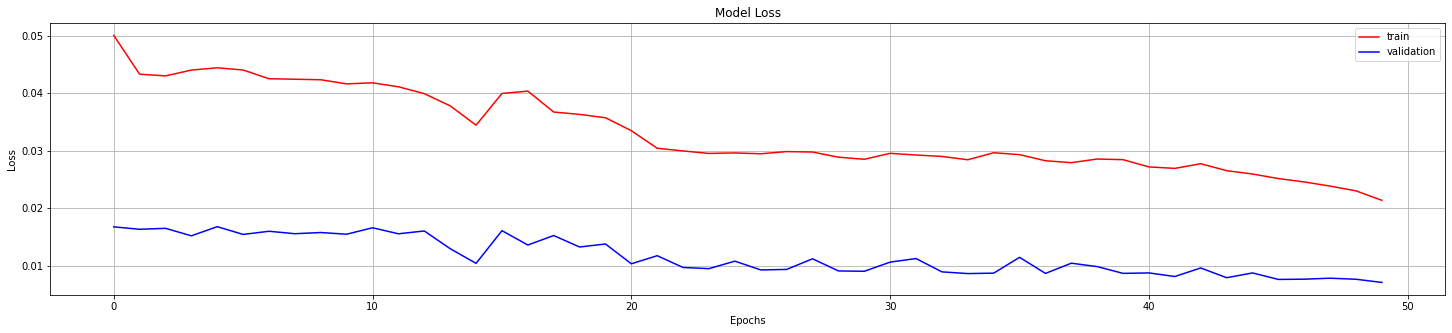

In [ ]:
# Plot the Loss Curves

plt.figure(figsize=(25,5))
plt.plot(history_indicator.history['loss'],'r')
plt.plot(history_indicator.history['val_loss'],'b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()


In [ ]:
predict=model.predict(X_test)
predictt = scaler.inverse_transform(predict)
ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [ ]:
print("Test data MSE: ", mean_squared_error(ytest,predictt))
print("Test data R2 score:", r2_score(ytest, predictt))

Test data MSE:  267040.31046677806
Test data R2 score: 0.5292894781055117


In [ ]:
k=test_data[len(test_data)-time_step:].reshape(1,-1)
temp=list(k)
temp=temp[0].tolist()
next_day_predict=[]
steps=time_step
for i in range(5):
    if(len(temp)>time_step):
        k=np.array(temp[1:])
        k = k.reshape(1,-1)
        k = k.reshape((1, steps, 1))
        predict_next_days = model.predict(k, verbose=0)
        temp.extend(predict_next_days[0].tolist())
        temp=temp[1:]
        next_day_predict.extend(predict_next_days.tolist())
        i=i+1
    else:
        k = k.reshape((1, steps,1))
        predict_next_days = model.predict(k, verbose=0)
        temp.extend(predict_next_days[0].tolist())
        next_day_predict.extend(predict_next_days.tolist())
        i=i+1
               
last_days=np.arange(1,time_step+1)
pre_days=np.arange(time_step+1,time_step+10+1)

print(next_day_predict)
print("--------------------------------------------")
print('last_days are',last_days)
print("--------------------------------------------")
print('pre_days are',pre_days)


[[0.11363843083381653], [0.04924529045820236], [0.11543864011764526], [0.19463953375816345], [0.14188556373119354]]
--------------------------------------------
last_days are [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
--------------------------------------------
pre_days are [16 17 18 19 20 21 22 23 24 25]


In [ ]:
value = np.empty((len(last_days)+11,1))
value[:] = np.nan
value = value.reshape(1,-1).tolist()[0]

real_last_days_value = value
predicted_days_value = value

real_last_days_value[1:time_step+1] = scaler.inverse_transform(khaperes_new[len(khaperes_new)-time_step:]).reshape(1,-1).tolist()[0]
predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(next_day_predict).reshape(-1,1)).reshape(1,-1).tolist()[0]

plot = pd.DataFrame({
    'real_last_days_value':real_last_days_value,
    'predicted_days_value':predicted_days_value
})

j=cycle(['Last 15 days with indicator of close price and view price','Predicted next 5 days with indicator of close price and view price'])
fig = px.line(plot,x=plot.index, y=[plot['real_last_days_value'],
                                                      plot['predicted_days_value']],
              labels={'value': 'Stock of indicator price','index': 'Timestamp'},color_discrete_map={
                 "real_last_days_value": "red",
                 "predicted_days_value": "red"})

fig.add_vline(x=15, line_width=3, line_dash="dash", line_color="blue")
fig.add_vline(x=16, line_width=3, line_dash="dash", line_color="green", fillcolor="blue")
fig.add_hrect(y0=16, y1=20, line_width=0, fillcolor="red", opacity=0.2)


fig.update_layout(title_text='Compare last 15 days vs next 5 days',
                  plot_bgcolor='white', font_size=13, font_color='black',legend_title_text='Indicators')

fig.for_each_trace(lambda t:  t.update(name = next(j)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

##### Real close_price--> 3 bahman in tsetmc site =965 , 4 bahmn = 965   constant
##### Real close_price with RSI --> 3 bahman (timestamp=15) in our data =1005,  our model prediction for 4 bahmn(timestamp=16) = 700 (decrease < -0.5 we assaign -1 (based on pdf))
##----------------------------